**K-Means**

In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [6]:
# Generate the synthetic dataset with clusters
X, y = make_blobs(n_samples=200, n_features=2, centers=5, random_state=42)

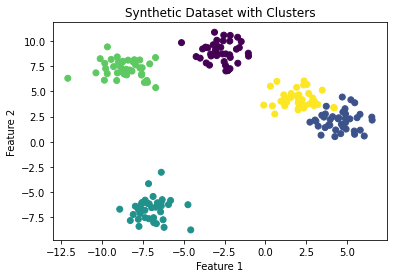

In [7]:
import matplotlib.pyplot as plt
# Plot the generated dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset with Clusters')
plt.show()

In [8]:
k=5
kmeans=KMeans(n_clusters=k,random_state=42)
y_pred=kmeans.fit_predict(X)

In [9]:
y_pred

array([2, 3, 4, 1, 0, 1, 4, 4, 2, 0, 0, 2, 2, 2, 1, 4, 3, 0, 4, 1, 1, 1,
       0, 3, 1, 3, 3, 0, 3, 2, 1, 1, 1, 2, 3, 1, 1, 0, 1, 3, 2, 4, 3, 2,
       2, 1, 1, 4, 4, 4, 4, 0, 1, 3, 4, 0, 3, 3, 0, 1, 0, 4, 2, 0, 1, 4,
       4, 2, 0, 3, 4, 3, 3, 0, 3, 1, 0, 2, 4, 3, 1, 3, 3, 2, 2, 1, 1, 1,
       4, 3, 2, 1, 2, 0, 0, 2, 0, 2, 4, 3, 0, 3, 0, 2, 0, 0, 1, 0, 2, 4,
       2, 1, 3, 0, 1, 3, 4, 0, 4, 4, 3, 3, 3, 1, 1, 0, 4, 4, 2, 2, 3, 1,
       2, 1, 3, 4, 4, 0, 2, 2, 0, 1, 0, 3, 4, 0, 2, 3, 0, 4, 1, 1, 3, 4,
       2, 4, 2, 4, 4, 0, 2, 0, 3, 2, 2, 0, 3, 4, 2, 0, 0, 1, 2, 1, 0, 2,
       1, 0, 1, 0, 3, 0, 1, 3, 2, 4, 4, 1, 3, 0, 2, 2, 3, 3, 2, 4, 4, 3,
       4, 0])

In [10]:
kmeans.cluster_centers_

array([[ 4.54996635,  2.16341636],
       [-8.56863765,  7.26172299],
       [-6.96417736, -6.7006896 ],
       [-2.71038846,  8.8833827 ],
       [ 1.88691387,  4.23193965]])

*Kmeans for Image segmentation*

Image segmentation is the task of partitioning an image into multiple segments. Here we are doing color segmentation

In [13]:
import PIL
import numpy as np

image = np.asarray(PIL.Image.open(fp="c:/Users/Muskan/DS_practice/Data_science/ladybug.png"))


In [14]:
image.shape

(513, 775, 4)

If the original image shape is (513, 775, 4), it indicates that the image has four color channels, which is likely an RGBA image (Red, Green, Blue, and Alpha channels)

In [21]:
#Extract the RGB channels from the image
X_rgb = image[:, :, :3]

# Reshape the RGB image to a 2D array of pixels
pixels = X_rgb.reshape(-1, 3)

In [22]:
# Apply K-means clustering
kmeans=KMeans(n_clusters=8,random_state=42).fit(pixels)
segmented_img=kmeans.cluster_centers_[kmeans.labels_]
segmented_img=segmented_img.reshape(X_rgb.shape)

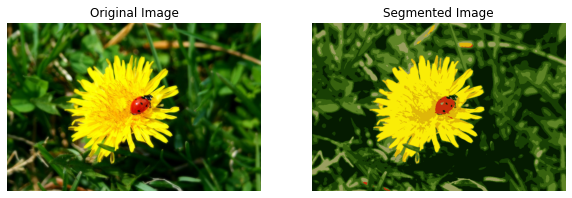

In [23]:
import matplotlib.pyplot as plt
# Display the original and segmented images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(X_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(segmented_img.astype(np.uint8))
ax[1].set_title('Segmented Image')
ax[1].axis('off')
plt.show()

**DBSCAN**

In [24]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt


In [25]:
# Generate sample data
np.random.seed(42)
X = np.concatenate([np.random.randn(50, 2) + [2, 2],
                    np.random.randn(30, 2) + [-2, -2],
                    np.random.randn(20, 2) + [2, -2]])


In [26]:
# Perform DBSCAN clustering
eps = 0.5  # Maximum distance between two samples to be considered neighbors
min_samples = 5  # Minimum number of samples required for a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)


In [27]:
# Number of clusters in labels, ignoring noise points if present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)


In [28]:
# Print cluster information
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")
print(f"Cluster labels: {labels}")


Estimated number of clusters: 3
Estimated number of noise points: 64
Cluster labels: [ 0 -1  0 -1  0  0  1 -1  0 -1 -1  1  0 -1  0 -1  1 -1  1 -1  0  0 -1  0
  1  0  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0  1  0 -1  0 -1  0 -1  0  1
  0  0 -1 -1  2 -1  2 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  2 -1  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


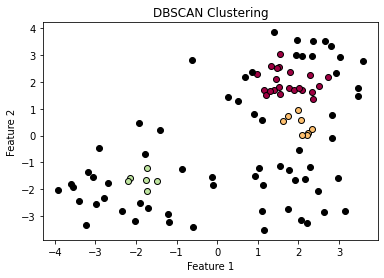

In [30]:
# Plot the clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
